In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rn
import os
import pandas as pd
import sys
import time
import seaborn as sns
from scipy.fftpack import fft,fftshift

sns.set_style("white")

plt.rcParams.update({                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "figure.figsize": (12,8),
    "axes.labelsize": 12,               # LaTeX default is 10pt font.
    "font.size": 11,
    "legend.fontsize": 10,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    })

## NN vs QRes: Sin Wave Superposition

In [2]:
results_nn = pd.read_pickle('results/sin_waves_nn.pkl')
results_qres = pd.read_pickle('results/sin_waves_qres.pkl')

In [3]:
l = [2, 128, 128, 128, 1]
num_param = 0
for i in range(len(l)-1):
    num_param += l[i] * l[i+1] + l[i+1]
print("NN Num params: %.2fk" % np.round(num_param / 1000, 2))

l = [2, 90, 90, 90, 1]
num_param = 0
for i in range(len(l)-1):
    num_param += l[i] * l[i+1] * 2 + l[i+1]
print("QRes Num params: %.2fk" % np.round(num_param / 1000, 2))

NN Num params: 33.54k
QRes Num params: 33.21k


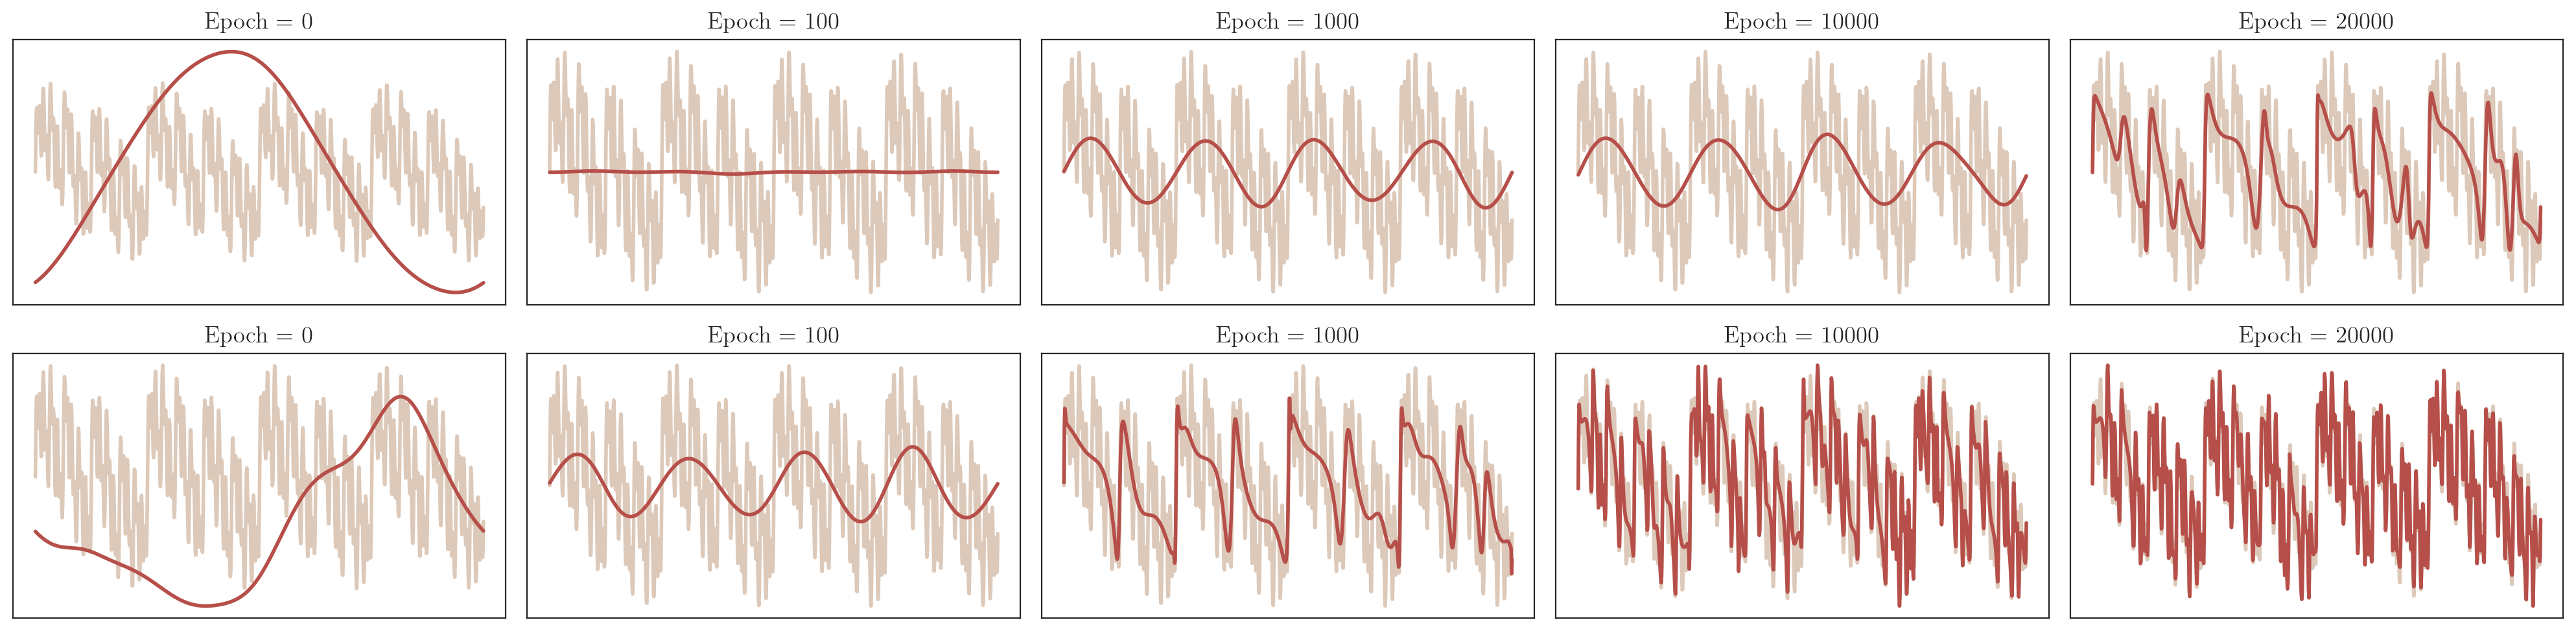

In [3]:
results = results_nn
epochs = results['snapshot_epochs'][0]
n_epochs = len(epochs)

# plot for NN
theta_train = results['theta_train'][0].reshape(-1)
inds = np.argsort(theta_train)
y_train_sorted = results['y_train'][0].reshape(-1)[inds]
theta_train_sorted = theta_train[inds]
outputs = results['snapshot_train_outputs'][0].reshape((n_epochs, -1))

num = len(epochs)

fig, axes = plt.subplots(figsize=(4*num, 5), nrows=2, ncols=num, dpi=200)

matlab_outputs = np.empty((num, len(inds)))

for i_plot, ep in enumerate(epochs):
    ax = axes[0, i_plot]
    i_ep = np.where(epochs == ep)[0]
    matlab_outputs[i_plot, :] = outputs[i_ep, inds]
    ax.plot(theta_train_sorted, y_train_sorted, '-', linewidth = 2, color='#BD9475', alpha=0.5)
    ax.plot(theta_train_sorted, outputs[i_ep, inds], '-', linewidth = 2, color='#B64F49')
    ax.set_title('Epoch = %d' % ep)
    ax.set_xticks([])
    ax.set_yticks([])


# plot for QRes     
results = results_qres
epochs = results['snapshot_epochs'][0]
n_epochs = len(epochs)

theta_train = results['theta_train'][0].reshape(-1)
inds = np.argsort(theta_train)
y_train_sorted = results['y_train'][0].reshape(-1)[inds]
theta_train_sorted = theta_train[inds]
outputs = results['snapshot_train_outputs'][0].reshape((n_epochs, -1))

num = len(epochs)
matlab_outputs = np.empty((num, len(inds)))

for i_plot, ep in enumerate(epochs):
    ax = axes[1, i_plot]
    i_ep = np.where(epochs == ep)[0]
    matlab_outputs[i_plot, :] = outputs[i_ep, inds]
    ax.plot(theta_train_sorted, y_train_sorted, '-', linewidth = 2, color='#BD9475', alpha=0.5)
    ax.plot(theta_train_sorted, outputs[i_ep, inds], '-', linewidth = 2, color='#B64F49')

    ax.set_title('Epoch = %d' % ep)
    ax.set_xticks([])
    ax.set_yticks([])
    
    
fig.tight_layout()
fig.savefig('figures/Sin-superposition.pdf', dpi=300)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


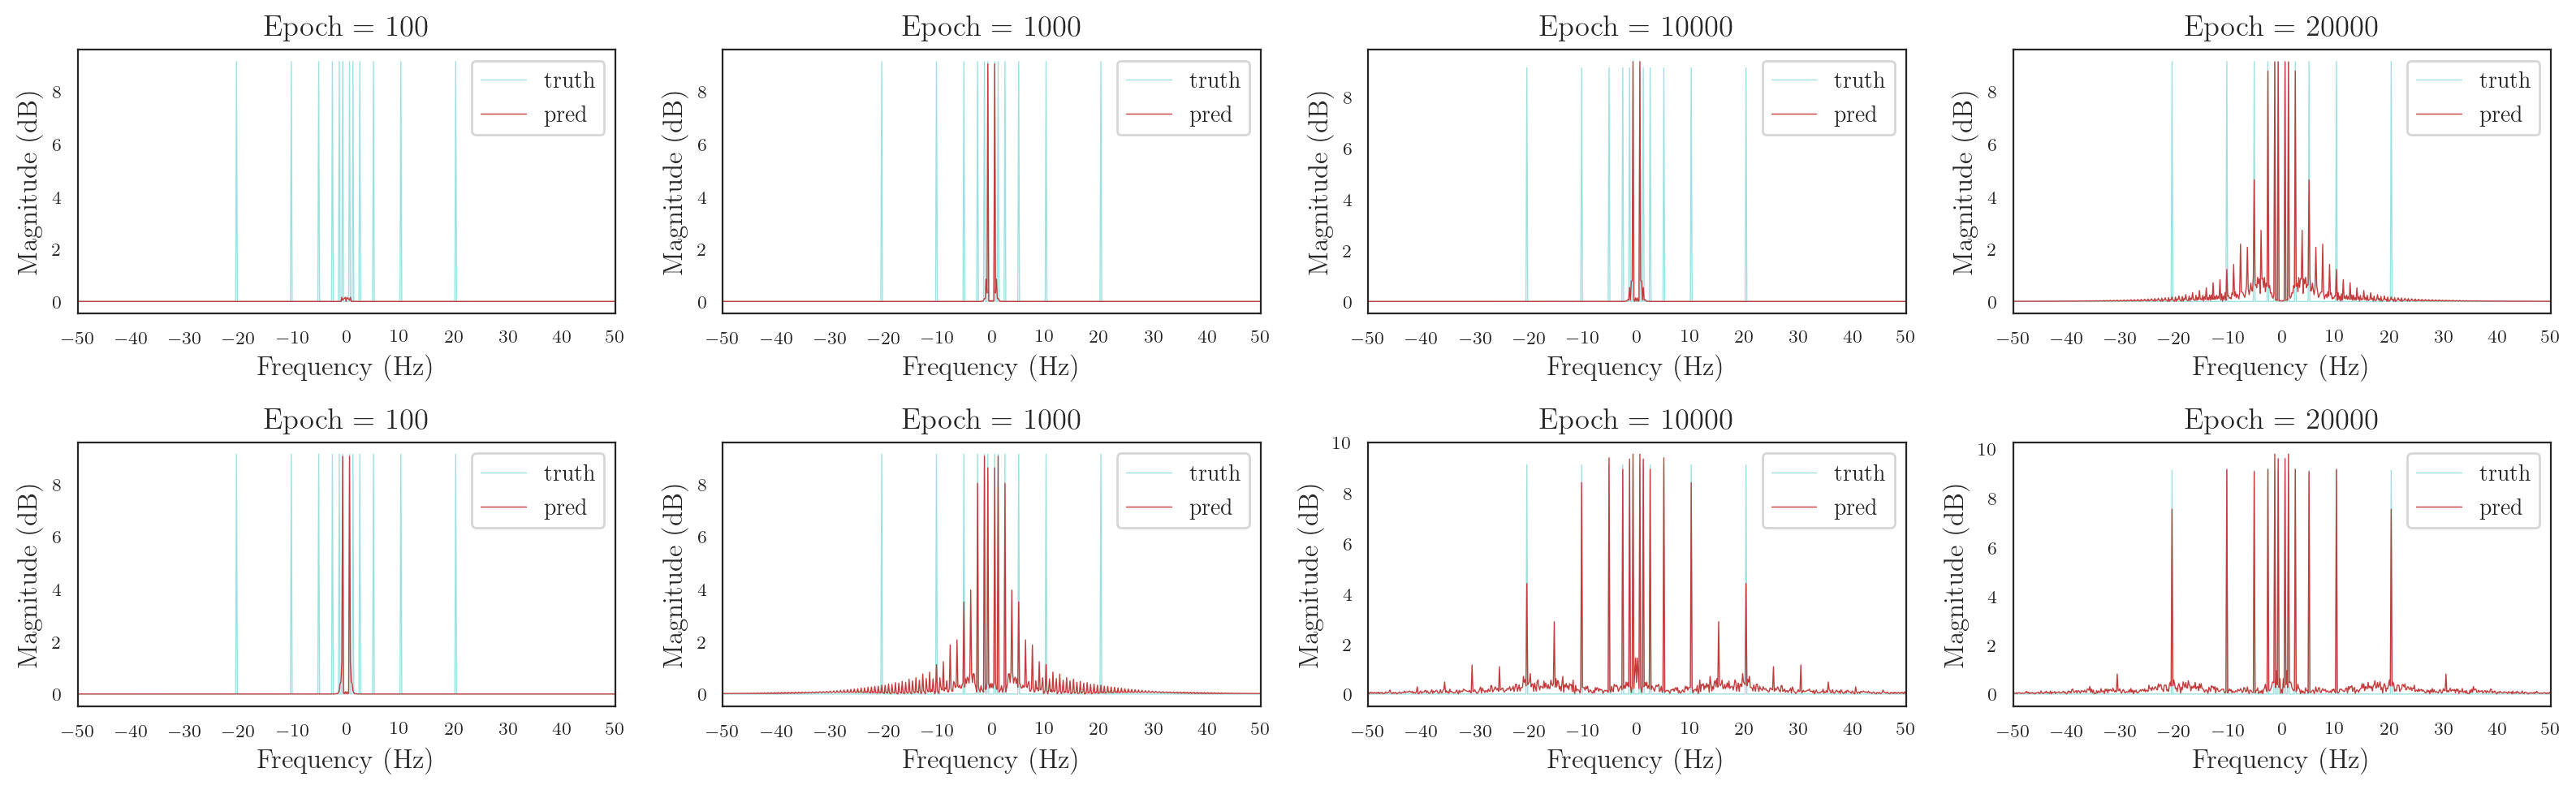

In [4]:
results = results_nn
epochs = results['snapshot_epochs'][0]
n_epochs = len(epochs)

# plot for NN
theta_train = results['theta_train'][0].reshape(-1)
inds = np.argsort(theta_train)
y_train_sorted = results['y_train'][0].reshape(-1)[inds]
theta_train_sorted = theta_train[inds]
outputs = results['snapshot_train_outputs'][0].reshape((n_epochs, -1))

num = len(epochs) - 1

fig, axes = plt.subplots(figsize=(4*num, 5), nrows=2, ncols=num, dpi=200)

matlab_outputs = np.empty((num, len(inds)))

for i_plot, ep in enumerate(epochs[1:]):
    ax = axes[0, i_plot]
    i_ep = np.where(epochs == ep)[0]
    matlab_outputs[i_plot, :] = outputs[i_ep, inds]
    NFFT = len(outputs[i_ep, inds])     
    fs = (len(theta_train_sorted) - 1) / (theta_train_sorted[-1] - theta_train_sorted[0])
    fVals = np.arange(start=-NFFT / 2, stop=NFFT / 2) * fs / NFFT

    X = fftshift(fft(y_train_sorted,NFFT))
    sns.lineplot(x=fVals, y=np.abs(X), lw=0.5, ax=ax, label='truth', color='#3BC4C3', alpha=0.5)
    
    X = fftshift(fft(outputs[i_ep, inds], NFFT))
    sns.lineplot(x=fVals, y=np.abs(X), lw=0.5, ax=ax, label='pred', color='#C43B3C')
    
    ax.set_title('Epoch = %d' % ep)
    ax.set_xlabel('Frequency (Hz)')         
    ax.set_ylabel('Magnitude (dB)')
    ax.set_xlim(-50, 50)
    ax.set_xticks(np.arange(-50, 50 + 10, 10))
    

# plot for QRes     
results = results_qres
epochs = results['snapshot_epochs'][0]
n_epochs = len(epochs)

theta_train = results['theta_train'][0].reshape(-1)
inds = np.argsort(theta_train)
y_train_sorted = results['y_train'][0].reshape(-1)[inds]
theta_train_sorted = theta_train[inds]
outputs = results['snapshot_train_outputs'][0].reshape((n_epochs, -1))

num = len(epochs) - 1
matlab_outputs = np.empty((num, len(inds)))

for i_plot, ep in enumerate(epochs[1:]):
    ax = axes[1, i_plot]
    i_ep = np.where(epochs == ep)[0]
    matlab_outputs[i_plot, :] = outputs[i_ep, inds]
    NFFT = len(outputs[i_ep, inds])     
    fs = (len(theta_train_sorted) - 1) / (theta_train_sorted[-1] - theta_train_sorted[0])
    fVals = np.arange(start=-NFFT / 2, stop=NFFT / 2) * fs / NFFT

    X = fftshift(fft(y_train_sorted,NFFT))
    sns.lineplot(x=fVals, y=np.abs(X), lw=0.5, ax=ax, label='truth', color='#3BC4C3', alpha=0.5)
    
    X = fftshift(fft(outputs[i_ep, inds], NFFT))
    sns.lineplot(x=fVals, y=np.abs(X), lw=0.5, ax=ax, label='pred', color='#C43B3C')
    
    ax.set_title('Epoch = %d' % ep)
    ax.set_xlabel('Frequency (Hz)')         
    ax.set_ylabel('Magnitude (dB)')
    ax.set_xlim(-50, 50)
    ax.set_xticks(np.arange(-50, 50 + 10, 10))

    
fig.tight_layout()
fig.savefig('figures/Sin-superposition_spectrum.pdf', dpi=300)